In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from scipy.sparse.linalg import norm

In [2]:
import sys
sys.path.insert(0, "../scripts")

from SZFW_lasso import *
from DZFW_lasso import *
from IZFW_lasso import *

## Load data

In [20]:
# load data
X, y = datasets.load_svmlight_file("../Data/covtype.libsvm.binary.scale.bz2")

In [21]:
# space dimension
d = X.shape[1]
n = y.shape[0]
print(f"Space Dimensions\nd: {d}")
print(f"n: {y.shape[0]}")

Space Dimensions
d: 54
n: 581012


In [22]:
# define the objective function
F = lambda w: 0.5/n * np.sum(np.power(y - X @ w, 2))

In [23]:
# initialize prarameters for the algorithm (in common for all the algorithms)

# stating point, sparse
np.random.seed(1007)
w0 = np.random.rand(d)
w0 = w0/np.sum(w0) * np.random.rand(1)

indeces = np.random.randint(low = 0, high = d-1, size = 20)
w0[indeces] = int(0)
w0 = np.zeros(d)
print(f"w0: {w0}")

w0: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


## Deterministic Gradient Free Frank Wolfe

In [24]:
%%time

# Lipschitz constant 
L = 3

fpred, f, w, mean, t, loss, f_values = detZFW(F, L, d, w0, T=100)

Loss evaluation at time 1:	0.7013836

Loss evaluation at time 2:	0.1212442

Loss evaluation at time 3:	0.0424383

Loss evaluation at time 4:	0.0199207

Loss evaluation at time 5:	0.0109946

Loss evaluation at time 6:	0.0067281



KeyboardInterrupt: 

In [ ]:
print(f'OUTPUT:\n\nF(w0) = {F(w0)}\n\nF(w_pred) = {fpred}\n\nF(w) = {f}\n\nw = {w}\n\naverage w = {mean}\n\nT = {t}')

In [32]:
lossd = np.load("../Data/results/loss_dZFW_lasso.npy") # data from colab (NOT NORMALIZED)
f_d = np.load("../Data/results/function_dZFW_lasso.npy")
f_d = f_d/n
f_star = np.min(f_d)

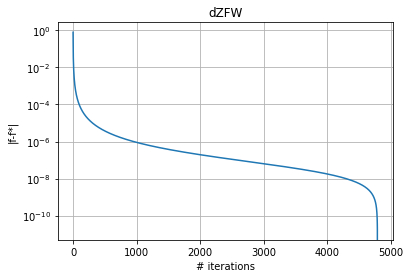

In [33]:
F_eval = np.abs(f_d - f_star)
plt.plot(F_eval)
plt.yscale("log")
plt.title("dZFW")
plt.xlabel("# iterations")
plt.ylabel("|f-f*|")
plt.grid()

## Stochastic Gradient Free Frank Wolfe

In [25]:
%%time
fpred, f, w, mean, t, loss, f_values = stochasticZFW(F, d, w0, method = "IRDSA1", r=1, T=10, eps=1e-10)

Loss evaluation at time 1:	0.0275749

Loss evaluation at time 2:	0.0056888

Loss evaluation at time 3:	0.2195518

Loss evaluation at time 4:	0.0789956

Loss evaluation at time 5:	0.0358417

Loss evaluation at time 6:	0.1041304

Loss evaluation at time 7:	0.0282238

Loss evaluation at time 8:	0.0458985

Loss evaluation at time 9:	0.0664736

Loss evaluation at time 10:	0.0526058

CPU times: user 1.51 s, sys: 70 ms, total: 1.58 s
Wall time: 1.58 s


In [26]:
print(f'OUTPUT:\n\nF(w0) = {F(w0)}\n\nF(w_pred) = {fpred}\n\nF(w) = {f}\n\nw = {w}\n\naverage w = {mean}\n\nT = {t}')

OUTPUT:

F(w0) = 1.2313988351359353

F(w_pred) = 0.722194251100365

F(w) = 0.6695884777393749

w = [ 0.16339869  0.07843137  0.          0.          0.          0.
  0.21568627  0.1503268   0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.09803922
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.05228758  0.          0.          0.         -0.05882353  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]

average w = [ 0.12222222  0.06666667  0.          0.          0.          0.
  0.03333333  0.14444444  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.03333333
  0.          0.  

In [28]:
loss_stochm6 = np.load("../Data/results/loss_SZFWm6_lasso.npy") # data from colab (NOT NORMALIZED)
f_stochm6 = np.load("../Data/results/function_SZFWm6_lasso.npy")
f_stochm6 = f_stochm6/n

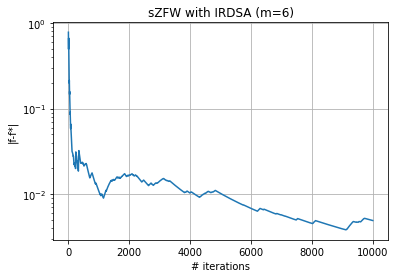

In [34]:
F_eval = np.abs(f_stochm6 - f_star)
plt.plot(F_eval)
plt.yscale("log")
plt.title("sZFW with IRDSA (m=6)")
plt.xlabel("# iterations")
plt.ylabel("|f-f*|")
plt.grid()

In [30]:
loss_stochm1 = np.load("../Data/results/loss_SZFWm1_lasso.npy") # data from colab (NOT NORMALIZED)
f_stochm1 = np.load("../Data/results/function_SZFWm1_lasso.npy")
f_stochm1 = f_stochm1/n

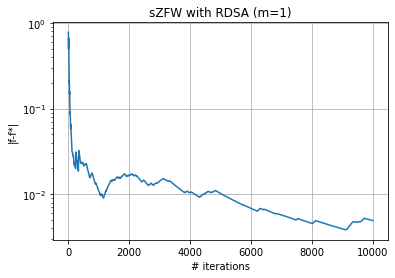

In [35]:
F_eval = np.abs(f_stochm6 - f_star)
plt.plot(F_eval)
plt.yscale("log")
plt.title("sZFW with RDSA (m=1)")
plt.xlabel("# iterations")
plt.ylabel("|f-f*|")
plt.grid()

## Zeroth order stochastic accelerated gradient method with Inexact updates

In [31]:
%%time 

# setting parameters
L = 0.1
D = 10000 # we will start from m = 6, up to T * (T+1) / D * (d+3) = 28785 (for T=100)
B = 1

fpred, f, w, mean, t, loss, f_values = IZFW(F, d, w0, L, B, r = 1, T = 10, eps = 1e-3)

Loss evaluation at time 1:	1.3791321

Loss evaluation at time 2:	0.4522815



KeyboardInterrupt: 

In [33]:
print(f'OUTPUT:\n\nF(w_pred) = {fpred}\n\nF(w) = {f}\n\nw = {w}\n\naverage w = {mean}\n\nT = {t}')

OUTPUT:

F(w_pred) = 259.05091757836703

F(w) = 259.0508674789056

w = [2.59069832e-12 3.76718696e-12 2.88669335e-14 ... 2.71115010e-12
 3.13978697e-13 1.17696342e-12]

average w = [3.24063977e-09 4.71227999e-09 3.61089254e-11 ... 3.39130988e-09
 3.92748103e-10 1.47223411e-09]

T = 10000


In [ ]:
f_inex = np.load('../Data/results/function_IZFW_lasso.npy') # data from cluster
F_eval = np.abs(f_inex/n - f_star)
plt.plot(F_eval)
plt.yscale("log")
plt.title("IZFW with m(t) < n")
plt.grid()

In [ ]:
F_eval = np.abs(f_inex/n - np.min(f_inex/n))
plt.plot(F_eval)
plt.yscale("log")
plt.title("IZFW with m(t) < n")
plt.grid()

# Test on artificial dataset


In [4]:
def CreateDataSet(n, d, s):
    """
    n rows, d features, s sparsity level
    """
    np.random.seed(1007)
    s = np.int(d * s)
    X = np.random.randn(n,d) 
    pn = int(s/2)
    w_s = np.concatenate((np.ones(pn), -np.ones(pn), np.zeros(d-2*pn)))
    w_s = w_s/np.sum(np.abs(w_s))
    epsilon = 0.01*np.random.rand(n) # noise
    y = X @ w_s + epsilon
    return X, y, w_s, epsilon

In [5]:
X, y, w_star, noise = CreateDataSet(n = 100, d = 1000, s = 0.05)

In [6]:
np.sum(np.abs(w_star))

1.0

In [7]:
# space dimension
d = X.shape[1]
n = y.shape[0]
f_star = F(w_star)
print(f"Space Dimensions\nd: {d}")
print(f"n: {y.shape[0]}")
print(f"f* = {f_star:.8f}")

Space Dimensions
d: 1000
n: 100
f* = 0.00001625


In [8]:
# initialize prarameters for the algorithm (in common for all the algorithms)

# stating point, sparse
np.random.seed(1007)
w0 = np.random.rand(d)
w0 = w0/np.sum(w0) * np.random.rand(1)

indeces = np.random.randint(low = 0, high = d-1, size = int(d/2))
w0[indeces] = int(0)
print(f"w0: {w0[:10]}, {np.count_nonzero(w0)} elements different from zero")

w0: [0.00000000e+00 6.94725184e-05 5.32349094e-07 6.23650766e-05
 0.00000000e+00 2.30543109e-05 0.00000000e+00 4.58801767e-05
 6.46670184e-05 0.00000000e+00], 595 elements different from zero


## Deterministic Gradient Free Frank Wolfe

In [49]:
L = 2/X.shape[0] * np.linalg.norm(X.T @ X)

In [66]:
%%time

# Lipschitz constant 

fpred, f, w, mean, t, loss, f_valuesd = detZFW(F, L, d, w0, T=1000, eps = 1e-8)

Loss evaluation at time 1:	0.2869688

Loss evaluation at time 2:	0.2624069

Loss evaluation at time 3:	0.0283229

Loss evaluation at time 4:	0.0363124

Loss evaluation at time 5:	0.0025483

Loss evaluation at time 6:	0.0077457

Loss evaluation at time 7:	0.0023958

Loss evaluation at time 8:	0.0006643

Loss evaluation at time 9:	0.0035124

Loss evaluation at time 10:	0.0015967

Loss evaluation at time 11:	0.0036494

Loss evaluation at time 12:	0.0023726

Loss evaluation at time 13:	0.0035014

Loss evaluation at time 14:	0.0010940

Loss evaluation at time 15:	0.0018221

Loss evaluation at time 16:	0.0000485

Loss evaluation at time 17:	0.0014287

Loss evaluation at time 18:	0.0023645

Loss evaluation at time 19:	0.0007307

Loss evaluation at time 20:	0.0011386

Loss evaluation at time 21:	0.0002368

Loss evaluation at time 22:	0.0005389

Loss evaluation at time 23:	0.0001284

Loss evaluation at time 24:	0.0002807

Loss evaluation at time 25:	0.0003878

Loss evaluation at time 26:	0.0004

In [67]:
print(f'OUTPUT:\n\nF(w0) = {F(w0)}\n\nF(w_pred) = {fpred}\n\nF(w) = {f}\n\nw = {w}\n\naverage w = {mean}\n\nT = {t}')

OUTPUT:

F(w0) = 0.009659341411376754

F(w_pred) = 0.0001572218539217139

F(w) = 0.00015722510307105125

w = [ 0.00000000e+00  2.19669002e-09  1.68326407e-11  1.97195588e-09
  0.00000000e+00  6.60848742e-03  0.00000000e+00  1.45071070e-09
  3.69948981e-03  0.00000000e+00  0.00000000e+00  4.74515930e-10
  7.92202773e-10  1.42048216e-09  2.24498830e-03  2.63663869e-09
  2.16029669e-09  0.00000000e+00  0.00000000e+00  9.68511210e-10
  0.00000000e+00  7.27249923e-03  0.00000000e+00  2.29969919e-10
  2.68046521e-09  2.71493511e-09  1.97556516e-09  4.74539905e-10
 -2.08688928e-03 -5.47018276e-03  0.00000000e+00 -2.44419149e-02
  0.00000000e+00  1.36442998e-09 -4.64807437e-03  0.00000000e+00
 -2.40624782e-02  2.54195325e-10  1.46595254e-09 -4.90103080e-03
  0.00000000e+00  2.70281978e-09 -3.41491178e-03  6.71313771e-10
 -6.98792133e-03  0.00000000e+00 -1.07190286e-02  2.33145447e-09
  1.47518269e-09  1.43269332e-10  0.00000000e+00 -7.11439890e-03
  0.00000000e+00  2.30688825e-09  2.00583715e-

In [69]:
loss_ad = np.load("../Data/results/loss_dZFW_lasso_AD.npy")
f_valuesd = np.load("../Data/results/function_dZFW_lasso_AD.npy")

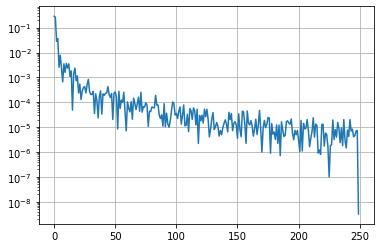

In [71]:
plt.plot(loss_ad)
plt.yscale("log")
plt.grid()

## Stochastic Gradient Free Frank Wolfe

In [72]:
%%time
fpred, f, w, mean, t, loss, f_valuess = stochasticZFW(F, d, w0, method = "IRDSA2", r=1, T=1000, eps=1e-8)

Loss evaluation at time 1:	0.0204991

Loss evaluation at time 2:	0.0089793

Loss evaluation at time 3:	0.0046565

Loss evaluation at time 4:	0.0021214

Loss evaluation at time 5:	0.0061588

Loss evaluation at time 6:	0.0030151

Loss evaluation at time 7:	0.0026727

Loss evaluation at time 8:	0.0143263

Loss evaluation at time 9:	0.0103020

Loss evaluation at time 10:	0.0060904

Loss evaluation at time 11:	0.0049963

Loss evaluation at time 12:	0.0023320

Loss evaluation at time 13:	0.0068838

Loss evaluation at time 14:	0.0057417

Loss evaluation at time 15:	0.0022328

Loss evaluation at time 16:	0.0048797

Loss evaluation at time 17:	0.0033407

Loss evaluation at time 18:	0.0016281

Loss evaluation at time 19:	0.0007241

Loss evaluation at time 20:	0.0020742

Loss evaluation at time 21:	0.0019329

Loss evaluation at time 22:	0.0016399

Loss evaluation at time 23:	0.0029881

Loss evaluation at time 24:	0.0006431

Loss evaluation at time 25:	0.0033496

Loss evaluation at time 26:	0.0004

In [73]:
print(f'OUTPUT:\n\nF(w0) = {F(w0)}\n\nF(w_pred) = {fpred}\n\nF(w) = {f}\n\nw = {w}\n\naverage w = {mean}\n\nT = {t}')

OUTPUT:

F(w0) = 0.009659341411376754

F(w_pred) = 0.00041188604665821313

F(w) = 0.00041188207139359375

w = [ 5.68484819e-03  6.78009821e-09  5.19540563e-11  2.68732549e-03
  0.00000000e+00  2.24996150e-09  0.00000000e+00  4.06758132e-03
  1.88566104e-03  7.03373614e-03  5.37463882e-03  1.46459655e-09
  2.44513908e-09  1.64515577e-02  1.75669129e-03  8.13800270e-09
  6.66776998e-09  0.00000000e+00  0.00000000e+00  2.98931623e-09
  5.21082038e-03  1.86857638e-02  1.60681485e-03  7.09803671e-10
  8.27327352e-09  8.37966511e-09  6.09759487e-09  1.46467054e-09
  3.88228232e-09 -5.91837659e-03 -1.00730909e-03 -6.79672224e-04
  0.00000000e+00  4.21132213e-09 -4.66011161e-03  0.00000000e+00
 -7.78311202e-03  7.84575545e-10 -2.65594540e-03 -4.45795269e-03
  0.00000000e+00  8.34227107e-09 -7.63672740e-03  2.07201438e-09
 -1.39175958e-02  0.00000000e+00  0.00000000e+00 -1.03518588e-03
  3.24155921e-04  4.42201736e-10  0.00000000e+00  1.99899024e-09
 -4.53114816e-05  7.12022578e-09  6.19102959e

In [75]:
loss_sad = np.load("../Data/results/loss_SZFW_lasso_AD.npy")
f_valuess = np.load("../Data/results/function_SZFW_lasso_AD.npy")

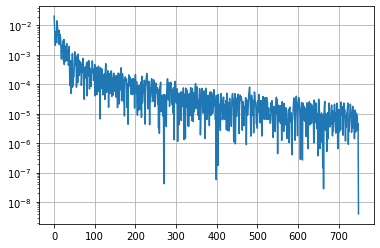

In [76]:
plt.plot(loss_sad)
plt.yscale("log")
plt.grid()

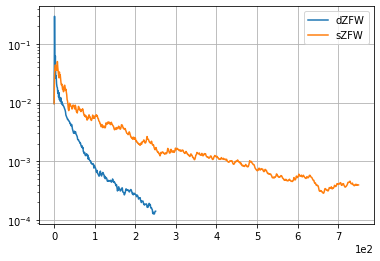

In [77]:
plt.plot(f_valuesd - f_star)
plt.plot(f_valuess - f_star)
plt.legend(('dZFW', 'sZFW'))
plt.yscale("log")
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.grid()

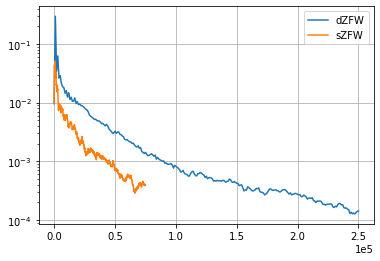

In [78]:
plt.plot(range(1, 251*d, d), f_valuesd - f_star)
plt.plot(range(0, 750*100+1, 100), f_valuess - f_star)
plt.yscale("log")
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.legend(('dZFW', 'sZFW'))
plt.grid()


## Zeroth order stochastic accelerated gradient method with Inexact updates

In [18]:
%%time 

# setting parameters
B=1   
L = 0.1
D = 2000 # we will start from m = 1, up to T * (T+1) / D * (d+3) = 1038 (for T = 45)
B = 1

fpred, f, w, mean, t, loss, f_values, inner = IZFW(F, d, w0, L, B, r = 1, T = 45, eps = 1e-8)

Loss evaluation at time 1:	0.0062157

Loss evaluation at time 2:	0.0061436

Loss evaluation at time 3:	0.0009303

Loss evaluation at time 4:	0.0049516

Loss evaluation at time 5:	0.0066938

Loss evaluation at time 6:	0.0033153

Loss evaluation at time 7:	0.0013730

Loss evaluation at time 8:	0.0023101

Loss evaluation at time 9:	0.0000965

Loss evaluation at time 10:	0.0018300

CPU times: user 37.5 s, sys: 4.77 s, total: 42.3 s
Wall time: 14.3 s


In [19]:
inner

[0, 25, 22, 18, 5, 2, 2, 2, 2, 2, 2]

In [ ]:
np.save("../Data/results/loss_IZFW_lasso_AD.npy", loss)
np.save("../Data/results/function_IZFW_lasso_AD.npy", f_values)

In [13]:
print(f'OUTPUT:\n\nF(w_pred) = {fpred}\n\nF(w) = {f}\n\nw = {w}\n\naverage w = {mean}\n\nT = {t}')

OUTPUT:

F(w_pred) = 0.01040385825353737

F(w) = 0.010793211105146678

w = [ 0.00000000e+00  3.00746833e-07  2.30454153e-09  2.69978687e-07
  0.00000000e+00  9.98022115e-08  0.00000000e+00  1.98615484e-07
  3.68705844e-04  0.00000000e+00  0.00000000e+00  6.49655446e-08
  4.66872140e-04  7.14823763e-04  0.00000000e+00  3.60979806e-07
  2.95764256e-07  0.00000000e+00  0.00000000e+00 -2.08878378e-03
  0.00000000e+00  2.62560660e-07  0.00000000e+00  3.14849726e-08
  3.66980055e-07  3.71699298e-07  2.70472829e-07  6.49688270e-08
  1.72207552e-07  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.86802868e-07  0.00000000e+00  0.00000000e+00
  2.80217120e-07  3.48016508e-08  2.00702229e-07  0.00000000e+00
  0.00000000e+00  3.70040599e-07  0.00000000e+00  9.19089582e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  3.19197313e-07
  2.01965922e-07  1.96148740e-08  0.00000000e+00  8.86698045e-08
  0.00000000e+00  3.15833973e-07  2.74617341e-07  9.09580959e-08
  8.36086884e-0

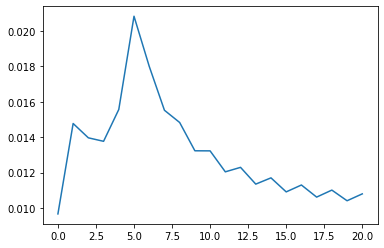

In [14]:
plt.plot(f_values)

In [42]:
m = lambda t: t * (t+1) / D * (d+3)
plt.plot(range(1, 251*d, d), f_valuesd - F(w_star))
plt.plot(range(0, 750*100+1, 100), f_valuess - F(w_star))
plt.plot([m(t) for t in range(101)], f - F(w_star))
plt.yscale("log")
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.legend(('dZFW', 'sZFW'))
plt.grid()



NameError: name 'f_valuesd' is not defined